This is the code to create the figure used in the paper which shows the whole USA.

In [1]:
%matplotlib inline

# Assuming we are in the notebooks directory, we need to move one up:
%cd ..

from __future__ import print_function

import os
import us
import glob

import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

/home/olivia/GitHub/redistrict


In [4]:
states = gpd.read_file('./fig/geojson/state_outlines.geo.json')
# states = gpd.read_file('./fig/shapefile/state_outlines.shp')
delete_states = []
for index, row in states.iterrows():
#     print(index, row)
    st = us.states.lookup(row['STATEFP'])
    if st.is_territory:
        print(st, index)
        delete_states.append(index)
states = states.drop(states.index[delete_states])
def get_abbr(row):
#     print(row)
    st = us.states.lookup(row['STATEFP'])
#     state_name.append(str(st.abbr))
#     print(str(st.abbr))
    return str(st.abbr)
states['State'] = states.apply(get_abbr, axis =1)
improvement = pd.read_csv('./fig/csv/improvement.csv')
improvement = improvement[['State', 'Improvement']]
# improvement.rename(columns={'Ratio of Mean Pairwise Distance of Clusters versus of Congressional Districts': 'Ratio'}, inplace=True)
result = gpd.GeoDataFrame(pd.merge(improvement, states, on='State'))
result['Colour'] = 1 - result['Improvement']

American Samoa 51
Guam 52
Northern Mariana Islands 53
Puerto Rico 54
Virgin Islands 55


In [5]:
# states.crs.pop('no_defs', None)
# result.crs.pop('no_defs', None)
result.crs = {'init': u'epsg:4326'}
states.crs = {'init': u'epsg:4326'}
# result.crs = None
# states.crs = None

print(result.crs, states.crs)

{'init': u'epsg:4326'} {'init': u'epsg:4326'}


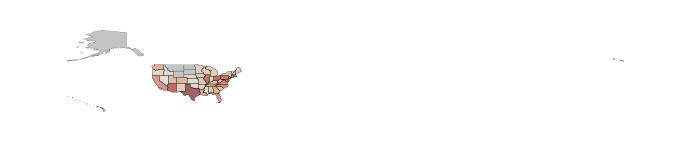

In [6]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
# states = states.to_crs({'init': 'epsg:3395'})
states.plot(ax=ax, color='#888888', linewidth=0.1)
# result = result.to_crs({'init': 'epsg:3395'})
result.plot(ax=ax, linewidth=0.1, column='Colour', cmap='OrRd')
plt.axis('off')
# plt.savefig('./fig/usa.pdf', bbox_inches='tight')
plt.show();

In [7]:
states.to_file('./fig/shapefile/results/states.shp', driver="ESRI Shapefile")
result.to_file('./fig/shapefile/results/result.shp', driver="ESRI Shapefile")

In [8]:
usa = gpd.read_file('./fig/shapefile/States/States.shp')


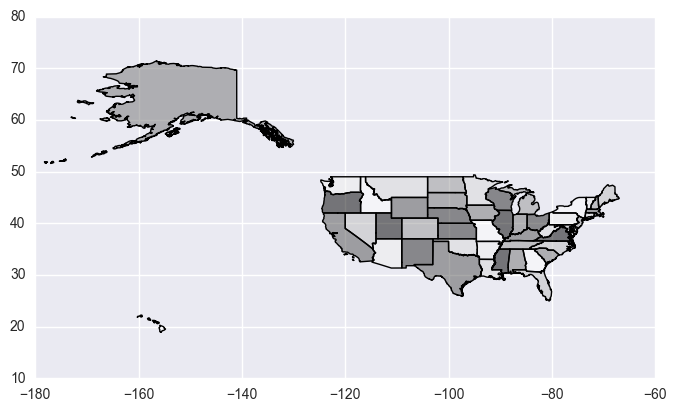

In [9]:
usa.plot()

In [10]:
usa.head()

,geometry,objectid,pop00_sqmi,pop2000,ss6gdbStat,st_areasha,st_lengths,state_abbr,state_name,sub_region
0,"(POLYGON ((-155.666192384 18.92178634599998, -...",1,190,1211537,6380.614,1.429289,11.952787,HI,Hawaii,Pacific
1,"(POLYGON ((-122.402015325 48.22521676600002, -...",2,88,5894121,67290.061,20.750757,34.956859,WA,Washington,Pacific
2,"POLYGON ((-111.475425302 44.70216230800003, -1...",3,6,902195,147244.653,45.134302,34.528065,MT,Montana,Mtn
3,"(POLYGON ((-69.77727631699997 44.074148154, -6...",4,40,1274923,32161.925,9.570698,18.898719,ME,Maine,N Eng
4,"POLYGON ((-98.730436795 45.938271192, -99.0068...",5,9,642200,70812.056,21.874874,21.353309,ND,North Dakota,W N Cen


In [11]:
del result['geometry']

In [12]:
result.head()

,State,Improvement,STATEFP,id,Colour
0,AL,0.811261,01,01,0.188739
1,AR,0.870680,05,05,0.129320
2,AZ,0.637308,04,04,0.362692
3,CA,0.709835,06,06,0.290165
4,CO,0.769941,08,08,0.230059


In [13]:
merged = pd.merge(usa, result, left_on='state_abbr', right_on='State')

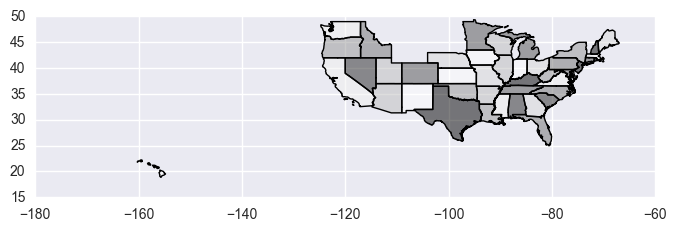

In [14]:
merged.plot()

In [15]:
merged.to_file('./fig/shapefile/results/result_better_shape.shp', driver="ESRI Shapefile")